## Seam Carving Implementation

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import scipy
import scipy.sparse.linalg
import ipywidgets as widgets
import seam_carving

## 1. Upload your own photo

In [2]:
# TODO: Run this block and upload your own picture using the upload widget

pic_upload = widgets.FileUpload(accept="image/*", multiple=False)
pic_upload

FileUpload(value=(), accept='image/*', description='Upload')

In [3]:
pic_upload.value

({'name': 'sunset.jpeg',
  'type': 'image/jpeg',
  'size': 1390982,
  'content': <memory at 0x7fe82c84f040>,
  'last_modified': datetime.datetime(2023, 9, 8, 4, 33, 1, 594000, tzinfo=datetime.timezone.utc)},)

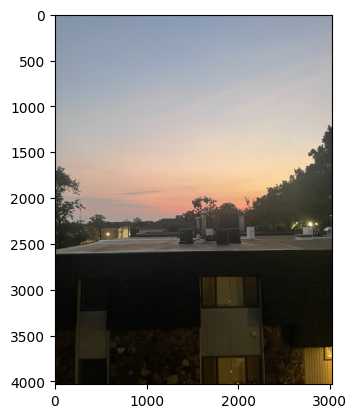

In [4]:
if len(pic_upload.value) == 1:
#     file_name = pic_upload.metadata[0]['name']
    content = pic_upload.value[0]['content'].tobytes()

    np_array = np.frombuffer(content, np.uint8)
    original = cv2.cvtColor(cv2.imdecode(np_array, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
    running_im = np.copy(original)
else:
    print("Error: Please upload 1 picture")

In [5]:
#TODO: Choose your width % to decrease by

desired_width = widgets.IntText(
    value=90,
    description='Width %:',
    disabled=False
)

desired_width

IntText(value=90, description='Width %:')

In [6]:
#TODO: Choose your height % to decrease by

desired_height = widgets.IntText(
    value=90,
    min=0,
    max=100,
    description='Height %:',
    disabled=False
)

desired_height

IntText(value=90, description='Height %:')

In [7]:
print(desired_height.value)

90


In [ ]:
for i in range(300): #todo: give user choice of width and height
    seam, energypaths = seam_carving.find_seam(running_im)
    running_im = seam_carving.removeseam(running_im,seam)

In [ ]:
fig = plt.figure(figsize=(8,12))
plt.subplot(3,1,1)
plt.imshow(energypaths)
plt.title('Final Energy Map')

axes = plt.subplot(3,1,2,facecolor='gray')
plt.imshow(original)
plt.title('Starting size: {0} x {1}'.format(np.shape(original)[0],
                                            np.shape(original)[1]))
plt.axis('equal')

plt.subplot(3,1,3,facecolor='gray')
plt.imshow(workingim)
plt.title('Final size: {0} x {1}'.format(np.shape(workingim)[0],
                                         np.shape(workingim)[1]))
plt.axis('equal')

print('Starting image size: {0}'.format(np.shape(original)))
print('Resulting image size: {0}'.format(np.shape(workingim)))